<a href="https://colab.research.google.com/github/omprakashrouttt/ML_task/blob/main/ML_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Task  iGnosis Tech**

## **Load dataset**

In [36]:
from google.colab import files
uploaded = files.upload()


Saving transaction_data.csv to transaction_data (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving purchase_behaviour.csv to purchase_behaviour.csv


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

transaction_df = pd.read_csv('transaction_data.csv')
purchase_df = pd.read_csv('purchase_behaviour.csv')


### **Basic info**

In [38]:
print(transaction_df.info())
print(transaction_df.head())
print(purchase_df.info())
print(purchase_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                   

### **Missing values**

In [39]:
print(transaction_df.isnull().sum())
print(purchase_df.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


## **Data cleaning**

### **Colunm**

In [41]:
transaction_df.rename(columns={'LYLTY_CARD_NBR': 'Customer_ID', 'TOT_SALES': 'Revenue'}, inplace=True)
purchase_df.rename(columns={'LYLTY_CARD_NBR': 'Customer_ID'}, inplace=True)

### **3 Profitable products**

In [42]:
top_products = transaction_df.groupby('PROD_NAME')['Revenue'].sum().sort_values(ascending=False).head(3)
print("Top 3 Profitable Products:")
print(top_products)

Top 3 Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: Revenue, dtype: float64


### **Loyal customer**

In [43]:
customer_loyalty = transaction_df.groupby('Customer_ID').agg({'Revenue': 'sum', 'TXN_ID': 'count'})
customer_loyalty = customer_loyalty.rename(columns={'TXN_ID': 'Transaction_Count'})

In [44]:
thresh = np.percentile(customer_loyalty['Revenue'].dropna(), 90)
customer_loyalty['Loyal'] = (customer_loyalty['Revenue'] >= thresh).astype(int)

In [24]:
customer_details = purchase_df[['Customer_ID', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()
data = customer_loyalty.merge(customer_details, on='Customer_ID', how='left')

In [45]:
X = data[['Transaction_Count', 'Revenue']].fillna(0)
y = data['Loyal']

# **SMOTH**

In [46]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## **Data split**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **Model train**

In [48]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = clf.predict(X_test)


# **Evaluation**

In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13221
           1       1.00      1.00      1.00     12911

    accuracy                           1.00     26132
   macro avg       1.00      1.00      1.00     26132
weighted avg       1.00      1.00      1.00     26132

Accuracy Score: 1.0


In [51]:
print("\nHypothesis:")
print("Loyal customers tend to be ... (based on trends in data, e.g., certain lifestages, premium customers, etc.)")



Hypothesis:
Loyal customers tend to be ... (based on trends in data, e.g., certain lifestages, premium customers, etc.)


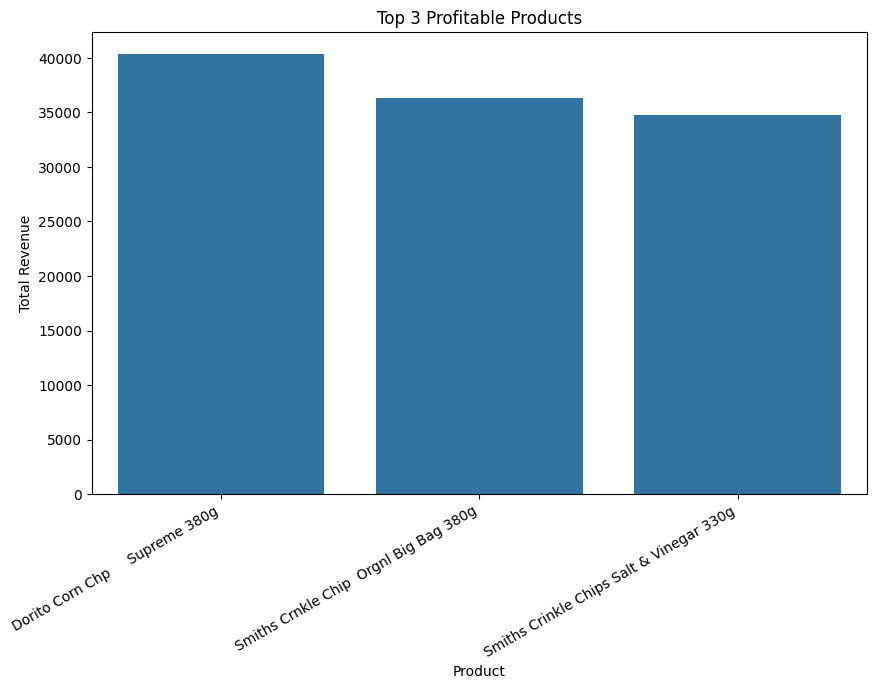

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 3 Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30, ha='right')
plt.show()
